# Machine Learning Roadmap

The process of training a machine learning model involves several key steps:

1. **Data collection and preparation**: This involves gathering and organizing the data that will be used to train the model. This includes tasks such as cleaning the data, removing irrelevant features, handling missing values, and converting the data into a suitable format for the machine learning algorithm. We are skipping collection, but we still need to do some basic cleaning.

2. **Feature engineering**: This involves selecting and transforming the input variables (features) that will be used to predict the output variable. This can include tasks such as scaling or normalizing the data, creating new features, and selecting the most relevant features based on domain knowledge or statistical analysis. 

3. **Model selection**: This involves selecting the appropriate machine learning algorithm for the specific problem and data at hand. This can involve experimenting with different algorithms and hyperparameters, or using pre-trained models for certain types of problems.

4. **Model training**: This involves using the selected algorithm and data to train the model by adjusting the model's parameters to minimize the error between the predicted output and the actual output. The training process involves iterating over the data multiple times, adjusting the model's parameters with each iteration to improve its accuracy.

5. **Model evaluation**: This involves assessing the performance of the trained model on a separate test dataset, to determine its accuracy and generalization ability. This can involve metrics such as accuracy, precision, recall, F1-score, or mean squared error, depending on the specific problem and type of model.

6. **Model deployment**: Once the model has been trained and evaluated, it can be deployed into a production environment for use in real-world applications. This can involve integrating the model into a larger system, building a user interface or API for interacting with the model, and monitoring its performance over time.

Overall, the process of training a machine learning model is iterative and often requires careful experimentation and testing to achieve optimal results. It involves a combination of domain knowledge, data analysis, and statistical techniques to build accurate and effective models for a wide range of applications.

It is common AI/ML knowledge that step 1 is the most important and time-consuming step (average ~80% of the total time doing AI/ML). Without a cleaned and reliable dataset, no amount of machine learning will be able to get accurate data. 

# Importing Data & Cleaning


In [451]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets


In [452]:

data = pd.read_csv('PECVD Randomly Generated Data.csv')
data

,Pwr.(w),TFR (mg/min),O2-Lo (cc/m),Temp(C),Pres.(torr),Total He Carrier (sccm),k value
0,960.0,5300.0,343.0,360.0,9.2,1225.0,2.848258
1,650.0,3000.0,68.0,340.0,10.2,1475.0,3.245444
2,1030.0,4800.0,58.0,380.0,4.7,550.0,3.953603
3,920.0,4800.0,438.0,380.0,4.7,1125.0,3.080942
4,500.0,4700.0,53.0,380.0,8.2,1200.0,3.749117
...,...,...,...,...,...,...,...
19995,630.0,4500.0,48.0,380.0,4.7,950.0,3.348780
19996,670.0,4600.0,108.0,380.0,8.2,1025.0,2.845660
19997,990.0,4700.0,63.0,380.0,5.2,1000.0,3.224239
19998,1020.0,4800.0,313.0,340.0,9.2,925.0,3.541268


In [453]:

data = data.drop_duplicates(ignore_index=True) #delete all duplicates



**Feature and Target Separation**
<br>
<br>We separate our independent variables from our dependent variables from the dataframe. This is to make the inputs readable for the model code and distinguish what are features and what is the target.

In [454]:
# Lets first create two new dataframes, a matrice representing the indpendent variables, and a vector representing the dependent variable/target

features = data.drop(['k value'], axis=1)
target = data['k value']

display(features.head())


,Pwr.(w),TFR (mg/min),O2-Lo (cc/m),Temp(C),Pres.(torr),Total He Carrier (sccm)
0,960.0,5300.0,343.0,360.0,9.2,1225.0
1,650.0,3000.0,68.0,340.0,10.2,1475.0
2,1030.0,4800.0,58.0,380.0,4.7,550.0
3,920.0,4800.0,438.0,380.0,4.7,1125.0
4,500.0,4700.0,53.0,380.0,8.2,1200.0


In [455]:
#Show Target. Looks different because it is just a vector rather than a df.
display(target)

0        2.848258
1        3.245444
2        3.953603
3        3.080942
4        3.749117
           ...   
19995    3.348780
19996    2.845660
19997    3.224239
19998    3.541268
19999    3.142747
Name: k value, Length: 20000, dtype: float64

# Data Transformation/Scaling (Feature Engineering)
<br>
<br>Here we are going to do some basic feature engineering by scaling the data.
<br>We do this so that every feature is of equal importance in our model analysis.

In [456]:
from sklearn.model_selection import train_test_split
x = features # independent variable matrix
y = target # dependent variable vector

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.10, random_state=42
)

# A more intuitive method for normalizing.
# This code explicitly writes out how to scale our data and make the mean of the feature data 0 and the stdev 1.

norm_train_X = (X_train - X_train.mean())/X_train.std()
norm_test_X = (X_test - X_train.mean())/X_train.std()
for column in X_train.columns: 
    norm_train_X[column] = (X_train[column] - \
        X_train[column].mean()) / X_train[column].std()     

for column in X_test.columns: 
    norm_test_X[column] = (X_test[column] - \
        X_test[column].mean()) / X_test[column].std() 

In [457]:
#Scaling

#X is your materials data 
#Y is your design matrix 

from sklearn.preprocessing import StandardScaler

x = features # independent variable matrix
y = target # dependent variable vector




scaler = StandardScaler()
scaled_x = scaler.fit_transform(x) 
print(f"The mean is {np.mean(scaled_x)}")
print(f"The stdev is {np.std(scaled_x)}")




The mean is -1.8586613729591286e-16
The stdev is 1.0


# Linear Regression
<br> With Linear Regression, there is no need to tune hyperparameters.
<br>

In [458]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# For this example, we only do one split.


X_train, X_test, y_train, y_test = train_test_split(
    scaled_x, y, test_size=0.25, random_state=42
)

linear_mlr = LinearRegression() # Create linear regression object
linear_mlr.fit(X_train, y_train)
y_prediction = linear_mlr.predict(X_test)
mae = mean_absolute_error(y_test,y_prediction)
print(f'The Mean Absolute Error is {mae}')


The Mean Absolute Error is 0.25676262911792386


# Ridge Regression


In [459]:
import matplotlib.pyplot as plt
# We are going to use this function to help evaluate and visualize hyperparameters.
# This function was adapted from NANO181/281 by the Materials Virtual Lab.

def plot_grid_search_results(gs, ylim=None):
    """
    Plots the results of GridSearchCV.

    Args:
        gs: A GridSearchCV object.
        ylim: Optional setting for y limits.
    """
    results = pd.DataFrame(gs.cv_results_)
    for c in results.columns:
        # Note that here we are working with just variations in one parameter.
        # So we can automatically find the name of that parameter.
        if c.startswith("param_"):
            x = c
            break
    fig, ax = plt.subplots(figsize=(16, 8))

    ax = sns.lineplot(x=x, y="mean_test_score", data=results)
    ax = sns.scatterplot(x=x, y="mean_test_score", data=results, marker="o")
    plt.xlabel(x)
    if ylim:
        plt.ylim(ylim)
    ax.legend(["Test"], loc=2)

The best parameter is 17.1718


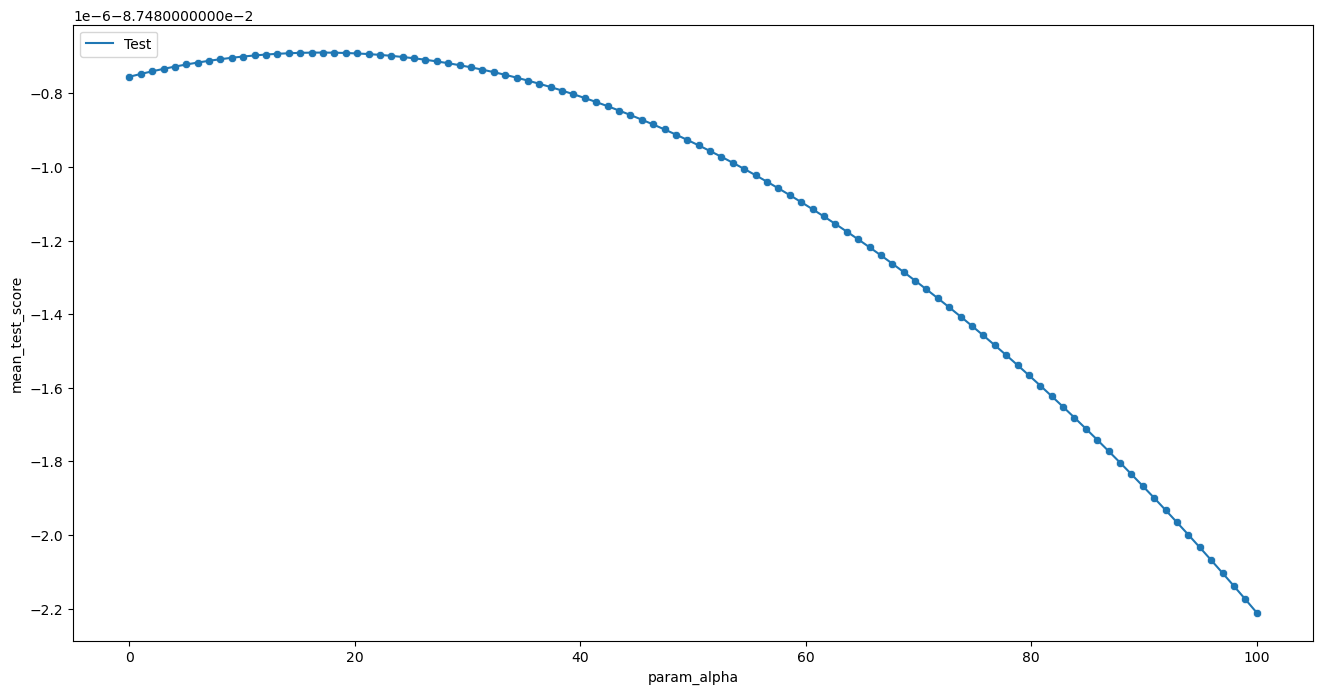

In [460]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV
#From before, we split our data into X_train, Y_train, X_test, Y_test

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
alphas = np.linspace(0.0001, 100, 100)
ridge_mlr = Ridge(max_iter=100000)

gs = GridSearchCV(ridge_mlr, param_grid={"alpha": alphas}, scoring="neg_mean_squared_error")


gs.fit(X_train,y_train)

results = pd.DataFrame(gs.cv_results_)


best_result = gs.best_params_
plot_grid_search_results(gs)
best_alpha = best_result['alpha']
print(f"The best parameter is {best_alpha}")







In [461]:
# Make Final Model
final_ridge_mlr = Ridge(alpha=best_alpha,max_iter=100000)
final_ridge_mlr.fit(X_train,y_train)
ridge_predict = final_ridge_mlr.predict(X_test)
ridge_mae = mean_absolute_error(y_test,ridge_predict)
print(f'The Mean Absolute Error for our ridge model is {mae}')

The Mean Absolute Error for our ridge model is 0.25676262911792386
